Found 737 images belonging to 2 classes.
Found 183 images belonging to 2 classes.
Metal device set to: Apple M2 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-07-15 20:01:20.586072: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-07-15 20:01:20.586246: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/kimsy/anaconda3/envs/ds38/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20


2023-07-15 20:01:21.992906: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-07-15 20:01:24.834258: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - ETA: 0s - loss: 0.3350 - accuracy: 0.8851

2023-07-15 20:01:44.222603: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - 25s 763ms/step - loss: 0.3350 - accuracy: 0.8851 - val_loss: 0.6300 - val_accuracy: 0.9000
Epoch 2/20
23/23 [==============================] - 8s 329ms/step - loss: 0.1140 - accuracy: 0.9674 - val_loss: 0.6200 - val_accuracy: 0.8938
Epoch 3/20
23/23 [==============================] - 8s 328ms/step - loss: 0.0561 - accuracy: 0.9858 - val_loss: 0.6480 - val_accuracy: 0.8938
Epoch 4/20
23/23 [==============================] - 8s 326ms/step - loss: 0.0268 - accuracy: 0.9957 - val_loss: 0.6847 - val_accuracy: 0.8625
Epoch 5/20
23/23 [==============================] - 8s 315ms/step - loss: 0.0299 - accuracy: 0.9915 - val_loss: 0.7501 - val_accuracy: 0.1063
Epoch 6/20
23/23 [==============================] - 7s 312ms/step - loss: 0.0173 - accuracy: 0.9957 - val_loss: 0.7933 - val_accuracy: 0.1000
Epoch 7/20
23/23 [==============================] - 7s 313ms/step - loss: 0.0373 - accuracy: 0.9872 - val_loss: 0.8457 - val_accuracy: 0.1250
Epoch 8/20
23/23

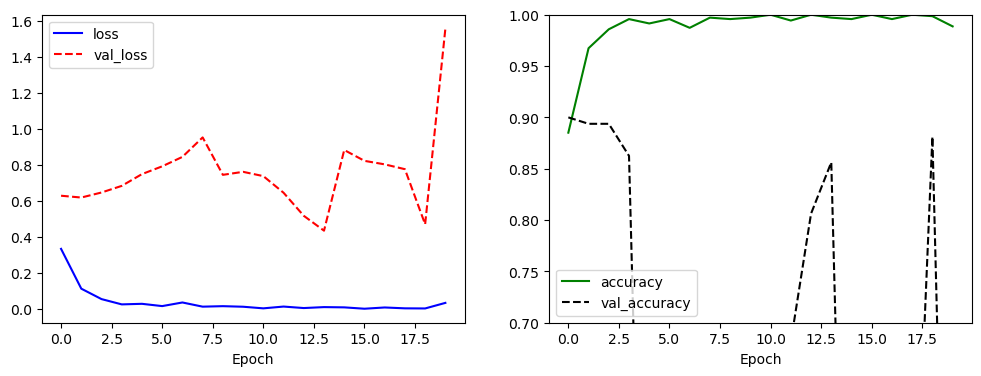

In [1]:
# 필요한 라이브러리를 임포트합니다.1ㅁ
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
import os
import time

# 데이터셋의 경로를 설정합니다.
train_dir = '/Users/kimsy/DataScience/dataset/fm_img/horizontal/train'
test_dir = '/Users/kimsy/DataScience/dataset/fm_img/horizontal/test'

# 이미지 데이터를 불러올 때 적용할 전처리 설정을 정의합니다.
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=1,
                                   validation_split=0.2) # validation set을 위해 20%의 데이터를 분리합니다.

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='binary',
                                                    subset='training')

validation_generator = train_datagen.flow_from_directory(train_dir,
                                                         target_size=(224, 224),
                                                         batch_size=32,
                                                         class_mode='binary',
                                                         subset='validation')

# 전이학습 모델(EfficientNetB0)을 불러오고, 새로운 분류 층을 추가합니다.
base_model = EfficientNetB0(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# 모델을 컴파일합니다.
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습을 진행합니다.
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // train_generator.batch_size,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // validation_generator.batch_size,
                    epochs=20)

# 학습 결과(loss, accuracy)를 그래프로 시각화합니다.
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

# 전이학습 + 이상탐지

Found 737 images belonging to 2 classes.
Found 183 images belonging to 2 classes.
Epoch 1/20


/Users/kimsy/anaconda3/envs/ds38/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2023-07-15 21:10:53.510910: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


46/46 [==============================] - ETA: 0s - loss: 0.2810 - accuracy: 0.9098

2023-07-15 21:11:36.940377: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


46/46 [==============================] - 53s 764ms/step - loss: 0.2810 - accuracy: 0.9098 - val_loss: 0.6377 - val_accuracy: 0.8864
Epoch 2/20
46/46 [==============================] - 12s 241ms/step - loss: 0.1084 - accuracy: 0.9723 - val_loss: 0.6470 - val_accuracy: 0.8920
Epoch 3/20
46/46 [==============================] - 10s 215ms/step - loss: 0.0823 - accuracy: 0.9792 - val_loss: 0.5027 - val_accuracy: 0.8864
Epoch 4/20
46/46 [==============================] - 14s 316ms/step - loss: 0.0616 - accuracy: 0.9875 - val_loss: 0.4192 - val_accuracy: 0.8864
Epoch 5/20
46/46 [==============================] - 9s 197ms/step - loss: 0.0414 - accuracy: 0.9931 - val_loss: 0.4871 - val_accuracy: 0.8920
Epoch 6/20
46/46 [==============================] - 9s 197ms/step - loss: 0.0346 - accuracy: 0.9958 - val_loss: 1.0294 - val_accuracy: 0.1136
Epoch 7/20
46/46 [==============================] - 9s 185ms/step - loss: 0.0446 - accuracy: 0.9903 - val_loss: 0.6390 - val_accuracy: 0.7102
Epoch 8/20
46

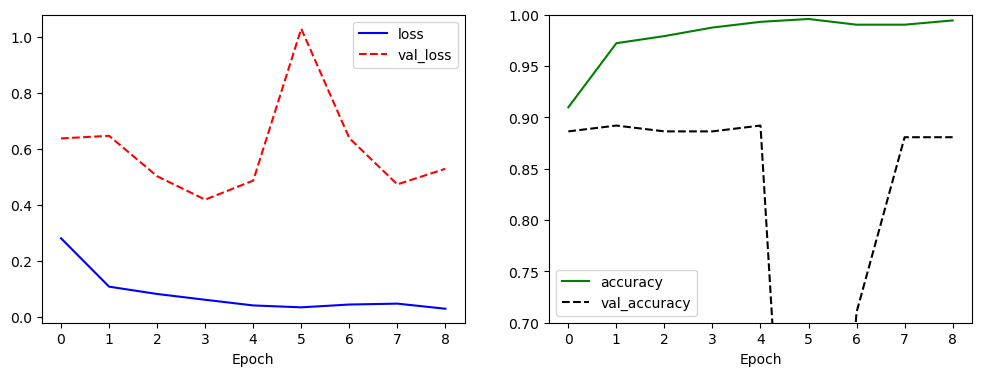

Found 920 images belonging to 2 classes.
Epoch 1/10


2023-07-15 21:13:04.495098: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


57/57 [==============================] - 4s 45ms/step - loss: 0.0273
Epoch 2/10
57/57 [==============================] - 2s 36ms/step - loss: 0.0093
Epoch 3/10
57/57 [==============================] - 2s 34ms/step - loss: 0.0080
Epoch 4/10
57/57 [==============================] - 2s 35ms/step - loss: 0.0062
Epoch 5/10
57/57 [==============================] - 2s 33ms/step - loss: 0.0061
Epoch 6/10
57/57 [==============================] - 2s 33ms/step - loss: 0.0058
Epoch 7/10
57/57 [==============================] - 2s 35ms/step - loss: 0.0053
Epoch 8/10
57/57 [==============================] - 2s 34ms/step - loss: 0.0050
Epoch 9/10
57/57 [==============================] - 2s 33ms/step - loss: 0.0049
Epoch 10/10
57/57 [==============================] - 2s 35ms/step - loss: 0.0049


2023-07-15 21:13:26.362213: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 119ms/step


2023-07-15 21:13:28.465058: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x3e19a1f40>

In [7]:
# 필요한 라이브러리를 임포트합니다.
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from keras.preprocessing import image
import os
import time
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout, ActivityRegularization
from tensorflow.keras.preprocessing import image



train_dir = '/Users/kimsy/DataScience/dataset/fm_img/horizontal/train'
test_dir = '/Users/kimsy/DataScience/dataset/fm_img/horizontal/test'

# 이미지 데이터를 불러올 때 적용할 전처리 설정을 정의합니다.
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=1,
                                   validation_split=0.2) # validation set을 위해 20%의 데이터를 분리합니다.

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=16,
                                                    class_mode='binary',
                                                    subset='training')

validation_generator = train_datagen.flow_from_directory(train_dir,
                                                         target_size=(224, 224),
                                                         batch_size=16,
                                                         class_mode='binary',
                                                         subset='validation')

# 전이학습 모델(EfficientNetB0)을 불러오고, 새로운 분류 층을 추가합니다.
# base_model = EfficientNetB0(weights='imagenet', include_top=False)
# x = base_model.output
# x = GlobalAveragePooling2D()(x)
# predictions = Dense(1, activation='sigmoid')(x)
# model = Model(inputs=base_model.input, outputs=predictions)

base_model = EfficientNetB0(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)  # Dropout 층을 추가합니다.
x = ActivityRegularization(l1=1e-5, l2=1e-4)(x)  # L1, L2 정규화를 추가합니다.
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# EarlyStopping 콜백을 정의합니다.
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# 모델을 컴파일합니다.
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습을 진행합니다. 이 때 EarlyStopping 콜백을 사용합니다.
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // train_generator.batch_size,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // validation_generator.batch_size,
                    epochs=20,
                    callbacks=[early_stopping])  # EarlyStopping 콜백을 추가합니다.

# 학습 결과(loss, accuracy)를 그래프로 시각화합니다.
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()


# 이상 탐지 모델을 정의하고 학습합니다.
# Autoencoder 모델을 예시로 사용하였습니다.
input_img = Input(shape=(224, 224, 3))
x = Flatten()(input_img)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
encoded = Dense(32, activation='relu')(x)

x = Dense(64, activation='relu')(encoded)
x = Dense(128, activation='relu')(x)
decoded = Dense(224 * 224 * 3, activation='sigmoid')(x)
decoded = Reshape((224, 224, 3))(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')


# 'good' 이미지만을 사용하여 Autoencoder를 학습합니다.
good_images = '/Users/kimsy/DataScience/dataset/fm_img/horizontal/train/good' # 'good' 이미지 데이터를 로드합니다.

good_datagen = ImageDataGenerator(rescale=1./255)
good_generator = good_datagen.flow_from_directory(os.path.dirname(good_images), # good_images의 상위 디렉토리를 지정
                                                  target_size=(224, 224),
                                                  batch_size=16,
                                                  class_mode='input', # autoencoder는 input을 target으로 사용하므로 'input'을 지정
                                                  subset='training')

# 'good' 이미지만을 사용하여 Autoencoder를 학습합니다.
autoencoder.fit(good_generator,
                epochs=10,
                steps_per_epoch=good_generator.samples // good_generator.batch_size,
                callbacks=[early_stopping])  # EarlyStopping 콜백을 추가합니다.

# 테스트 이미지에 대해 이미지 분류 모델과 이상 탐지 모델을 사용하여 예측을 수행합니다.
filenames = []  # 파일 이름을 저장할 리스트를 초기화합니다.
predictions = []  # 예측 결과를 저장할 리스트를 초기화합니다.
times = []  # 추론 시간을 저장할 리스트를 초기화합니다.

for file in os.listdir(test_dir):
    img_path = os.path.join(test_dir, file)
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    
    start_time = time.time()
    classification_prediction = model.predict(img_batch)  # 이미지 분류 모델의 예측
    anomaly_prediction = autoencoder.predict(img_batch)  # 이상 탐지 모델의 예측
    end_time = time.time()
    
    # 이상 탐지 모델의 예측이 'good'의 확률이 80% 미만인 경우, 'ng'로 판정합니다.
    if np.mean(np.power(img_batch - anomaly_prediction, 2)) < 0.8:
        final_prediction = 'ng'
    else:
        final_prediction = 'good' if classification_prediction > 0.5 else 'ng'
    
    filenames.append(file)
    predictions.append(final_prediction)
    times.append(end_time - start_time)



# 테스트 결과를 테이블로 출력합니다.
results = pd.DataFrame({'Filename': filenames, 'Prediction': predictions, 'Inference Time': times})
print(results)


# mobilenet_v2

Found 737 images belonging to 2 classes.
Found 183 images belonging to 2 classes.


Epoch 1/20


/Users/kimsy/anaconda3/envs/ds38/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2023-07-15 21:54:35.815609: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


46/46 [==============================] - ETA: 0s - loss: 0.4316 - accuracy: 0.8544

2023-07-15 21:54:57.783585: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


46/46 [==============================] - 27s 421ms/step - loss: 0.4316 - accuracy: 0.8544 - val_loss: 1.6750 - val_accuracy: 0.1080
Epoch 2/20
46/46 [==============================] - 7s 146ms/step - loss: 0.1673 - accuracy: 0.9709 - val_loss: 2.0266 - val_accuracy: 0.1136
Epoch 3/20
46/46 [==============================] - 7s 145ms/step - loss: 0.1590 - accuracy: 0.9723 - val_loss: 1.3577 - val_accuracy: 0.2102
Epoch 4/20
46/46 [==============================] - 6s 132ms/step - loss: 0.0914 - accuracy: 0.9834 - val_loss: 1.3161 - val_accuracy: 0.2500
Epoch 5/20
46/46 [==============================] - 6s 132ms/step - loss: 0.0678 - accuracy: 0.9889 - val_loss: 0.7724 - val_accuracy: 0.5852
Epoch 6/20
46/46 [==============================] - 6s 126ms/step - loss: 0.0641 - accuracy: 0.9820 - val_loss: 0.5446 - val_accuracy: 0.7898
Epoch 7/20
46/46 [==============================] - 6s 126ms/step - loss: 0.0527 - accuracy: 0.9889 - val_loss: 0.5173 - val_accuracy: 0.8125
Epoch 8/20
46/46

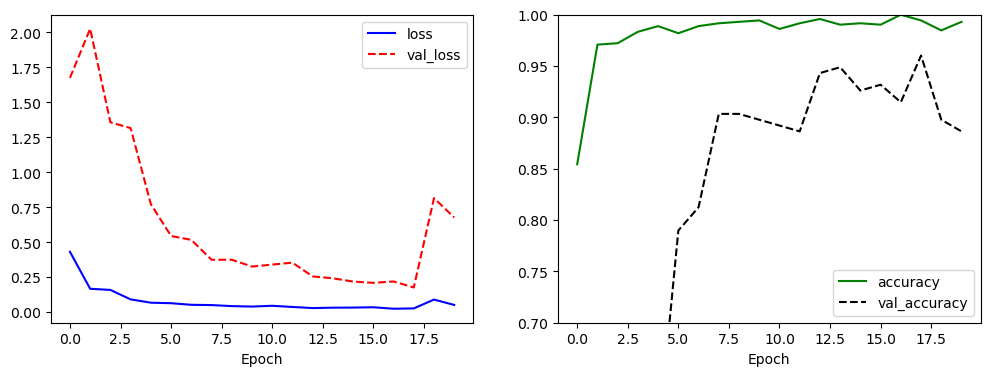

Found 920 images belonging to 2 classes.
Epoch 1/10


2023-07-15 21:56:57.755663: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


57/57 [==============================] - 4s 51ms/step - loss: 0.0291
Epoch 2/10
57/57 [==============================] - 2s 33ms/step - loss: 0.0145
Epoch 3/10
57/57 [==============================] - 2s 33ms/step - loss: 0.0086
Epoch 4/10
57/57 [==============================] - 2s 33ms/step - loss: 0.0065
Epoch 5/10
57/57 [==============================] - 2s 35ms/step - loss: 0.0062
Epoch 6/10
57/57 [==============================] - 2s 33ms/step - loss: 0.0061
Epoch 7/10
57/57 [==============================] - 2s 36ms/step - loss: 0.0060
Epoch 8/10
57/57 [==============================] - 2s 36ms/step - loss: 0.0053
Epoch 9/10
57/57 [==============================] - 2s 34ms/step - loss: 0.0051
Epoch 10/10
57/57 [==============================] - 2s 33ms/step - loss: 0.0050


In [19]:
# 필요한 라이브러리를 임포트합니다.
import os
import time
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import EfficientNetB0, MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Flatten, Reshape, Dropout, ActivityRegularization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import matplotlib.pyplot as plt

# 데이터셋의 경로를 설정합니다.
train_dir = '/Users/kimsy/DataScience/dataset/fm_img/horizontal/train'
test_dir = '/Users/kimsy/DataScience/dataset/fm_img/horizontal/test'

# 이미지 데이터를 불러올 때 적용할 전처리 설정을 정의합니다.
datagen = ImageDataGenerator(rescale=1./255, 
                             rotation_range=1,
                             validation_split=0.2) # validation set을 위해 20%의 데이터를 분리합니다.

train_generator = datagen.flow_from_directory(train_dir,
                                              target_size=(224, 224),
                                              batch_size=16,
                                              class_mode='binary',
                                              subset='training')

validation_generator = datagen.flow_from_directory(train_dir,
                                                   target_size=(224, 224),
                                                   batch_size=16,
                                                   class_mode='binary',
                                                   subset='validation')

# 전이 학습 모델(EfficientNetB0)을 불러오고, 새로운 분류 층을 추가합니다.
# base_model = EfficientNetB0(weights='imagenet', include_top=False)

# MobileNetV2 모델 불러오기
base_model = MobileNetV2(weights='imagenet', include_top=False)
 
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)  # Dropout 층을 추가합니다.
x = ActivityRegularization(l1=1e-5, l2=1e-4)(x)  # L1, L2 정규화를 추가합니다.
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# EarlyStopping 콜백을 정의합니다.
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# 모델을 컴파일합니다.
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습을 진행합니다. 이 때 EarlyStopping 콜백을 사용합니다.
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // train_generator.batch_size,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // validation_generator.batch_size,
                    epochs=20,
                    callbacks=[early_stopping])  # EarlyStopping 콜백을 추가합니다.

# 학습 결과(loss, accuracy)를 그래프로 시각화합니다.
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()


# 이상 탐지 모델을 정의하고 학습합니다.
# Autoencoder 모델을 예시로 사용하였습니다.
input_img = Input(shape=(224, 224, 3))
x = Flatten()(input_img)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
encoded = Dense(32, activation='relu')(x)

x = Dense(64, activation='relu')(encoded)
x = Dense(128, activation='relu')(x)
decoded = Dense(224 * 224 * 3, activation='sigmoid')(x)
decoded = Reshape((224, 224, 3))(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# 'good' 이미지만을 사용하여 Autoencoder를 학습합니다.
good_images = os.path.join(train_dir, 'good')  # 'good' 이미지 데이터를 로드합니다.

good_datagen = ImageDataGenerator(rescale=1./255)
good_generator = good_datagen.flow_from_directory(os.path.dirname(good_images), # good_images의 상위 디렉토리를 지정
                                                  target_size=(224, 224),
                                                  batch_size=16,
                                                  class_mode='input', # autoencoder는 input을 target으로 사용하므로 'input'을 지정
                                                  subset='training')

# 'good' 이미지만을 사용하여 Autoencoder를 학습합니다.
autoencoder.fit(good_generator,
                epochs=10,
                steps_per_epoch=good_generator.samples // good_generator.batch_size,
                callbacks=[early_stopping])  # EarlyStopping 콜백을 추가합니다.




In [21]:
# 결과를 저장할 리스트를 초기화합니다.
filenames = []
good_confidences = []
ng_confidences = []
anomaly_confidences = []
predictions = []
times = []

# 테스트 디렉토리를 탐색하며 각 파일에 대한 예측을 수행합니다.
for root, dirs, files in os.walk(test_dir):
    for file in files:
        if file.endswith(".jpg"):  # 이미지 파일만 처리합니다.
            img_path = os.path.join(root, file)
            img = load_img(img_path, target_size=(224, 224))
            img_array = img_to_array(img)
            img_batch = np.expand_dims(img_array, axis=0)

            start_time = time.time()
            classification_prediction = model.predict(img_batch)  # 이미지 분류 모델의 예측
            anomaly_prediction = autoencoder.predict(img_batch)  # 이상 탐지 모델의 예측
            end_time = time.time()

            # 'good', 'ng', 이상 탐지에 대한 신뢰도를 계산합니다.
            good_confidence = classification_prediction[0][0]
            ng_confidence = 1 - good_confidence
            anomaly_confidence = np.mean(np.power(img_batch - anomaly_prediction, 2))

            # 이상 탐지 모델의 예측이 'good'의 확률이 80% 미만인 경우, 'ng'로 판정합니다.
            if anomaly_confidence < 0.8:
                final_prediction = 'ng'
            else:
                final_prediction = 'good' if good_confidence > 0.5 else 'ng'

            filenames.append(file)
            good_confidences.append(good_confidence)
            ng_confidences.append(ng_confidence)
            anomaly_confidences.append(anomaly_confidence)
            predictions.append(final_prediction)
            times.append(end_time - start_time)

# 테스트 결과를 테이블로 출력합니다.
results = pd.DataFrame({
    'Filename': filenames,
    'Good Confidence': good_confidences,
    'NG Confidence': ng_confidences,
    'Anomaly Confidence': anomaly_confidences,
    'Prediction': predictions,
    'Inference Time': times
})


results


1/1 [==============================] - 0s 10ms/step


,Filename,Good Confidence,NG Confidence,Anomaly Confidence,Prediction,Inference Time
0,2022-12-27-145340365.jpg,0.999471,0.000529,52996.730469,good,0.162392
1,2022-12-27-145343052.jpg,0.999628,0.000372,51828.753906,good,0.064014
2,2022-12-27-150341020.jpg,0.999769,0.000231,53781.097656,good,0.064436
3,2022-12-27-150509702.jpg,0.999671,0.000329,53703.429688,good,0.066165
4,2022-12-27-145348956.jpg,0.999265,0.000735,53844.675781,good,0.065103
5,2022-12-27-150352799.jpg,0.999774,0.000226,53673.386719,good,0.063348
6,2022-12-27-150233552.jpg,0.999645,0.000355,53056.332031,good,0.066306
7,2022-12-27-152348017.jpg,0.999649,0.000351,54017.640625,good,0.062083
8,2022-12-27-151149811.jpg,0.999742,0.000258,53251.843750,good,0.063216
9,2022-12-27-153646721.jpg,0.999665,0.000335,54675.199219,good,0.065972


In [ ]:
from tensorflow.keras.models import load_model

# 이미지 분류 모델을 로드합니다.
model = load_model('image_classification_model.h5')

# 이상 탐지 모델을 로드합니다.
autoencoder = load_model('anomaly_detection_model.h5')

# Densnet

Found 737 images belonging to 2 classes.
Found 183 images belonging to 2 classes.
Metal device set to: Apple M2 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-07-16 19:36:09.486662: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-07-16 19:36:09.487315: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


51877672/51877672 [==============================] - 3s 0us/step
Epoch 1/20


/Users/kimsy/anaconda3/envs/ds38/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2023-07-16 19:36:15.201735: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-07-16 19:36:18.473261: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


46/46 [==============================] - ETA: 0s - loss: 0.6356 - accuracy: 0.7878

2023-07-16 19:36:50.298828: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


46/46 [==============================] - 40s 600ms/step - loss: 0.6356 - accuracy: 0.7878 - val_loss: 0.9746 - val_accuracy: 0.2443
Epoch 2/20
46/46 [==============================] - 15s 324ms/step - loss: 0.2440 - accuracy: 0.9723 - val_loss: 0.7736 - val_accuracy: 0.5000
Epoch 3/20
46/46 [==============================] - 16s 347ms/step - loss: 0.1919 - accuracy: 0.9847 - val_loss: 0.7507 - val_accuracy: 0.6080
Epoch 4/20
46/46 [==============================] - 15s 322ms/step - loss: 0.1681 - accuracy: 0.9792 - val_loss: 0.7773 - val_accuracy: 0.6023
Epoch 5/20
46/46 [==============================] - 14s 300ms/step - loss: 0.1357 - accuracy: 0.9847 - val_loss: 0.4108 - val_accuracy: 0.8580
Epoch 6/20
46/46 [==============================] - 14s 304ms/step - loss: 0.1254 - accuracy: 0.9847 - val_loss: 1.4102 - val_accuracy: 0.4318
Epoch 7/20
46/46 [==============================] - 15s 327ms/step - loss: 0.1037 - accuracy: 0.9847 - val_loss: 0.5291 - val_accuracy: 0.8011
Epoch 8/20

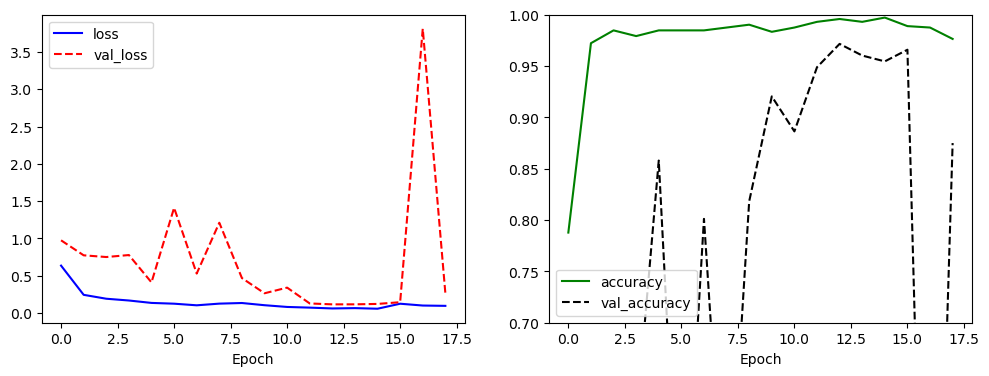

Found 920 images belonging to 2 classes.
Epoch 1/10


2023-07-16 19:40:58.483000: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


57/57 [==============================] - 4s 58ms/step - loss: 0.0288
Epoch 2/10
57/57 [==============================] - 3s 44ms/step - loss: 0.0105
Epoch 3/10
57/57 [==============================] - 2s 37ms/step - loss: 0.0075
Epoch 4/10
57/57 [==============================] - 2s 36ms/step - loss: 0.0062
Epoch 5/10
57/57 [==============================] - 2s 37ms/step - loss: 0.0060
Epoch 6/10
57/57 [==============================] - 2s 35ms/step - loss: 0.0062
Epoch 7/10
57/57 [==============================] - 2s 37ms/step - loss: 0.0056
Epoch 8/10
57/57 [==============================] - 2s 35ms/step - loss: 0.0050
Epoch 9/10
57/57 [==============================] - 2s 36ms/step - loss: 0.0049
Epoch 10/10
57/57 [==============================] - 2s 36ms/step - loss: 0.0049


In [2]:
# 필요한 라이브러리를 임포트합니다.
import os
import time
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import EfficientNetB0, MobileNetV2, densenet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Flatten, Reshape, Dropout, ActivityRegularization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import matplotlib.pyplot as plt

# 데이터셋의 경로를 설정합니다.
train_dir = '/Users/kimsy/DataScience/dataset/fm_img/horizontal/train'
test_dir = '/Users/kimsy/DataScience/dataset/fm_img/horizontal/test'

# 이미지 데이터를 불러올 때 적용할 전처리 설정을 정의합니다.
datagen = ImageDataGenerator(rescale=1./255, 
                             rotation_range=1,
                             validation_split=0.2) # validation set을 위해 20%의 데이터를 분리합니다.

train_generator = datagen.flow_from_directory(train_dir,
                                              target_size=(224, 224),
                                              batch_size=16,
                                              class_mode='binary',
                                              subset='training')

validation_generator = datagen.flow_from_directory(train_dir,
                                                   target_size=(224, 224),
                                                   batch_size=16,
                                                   class_mode='binary',
                                                   subset='validation')

# 전이 학습 모델(EfficientNetB0)을 불러오고, 새로운 분류 층을 추가합니다.
# base_model = EfficientNetB0(weights='imagenet', include_top=False)

# # MobileNetV2 모델 불러오기
# base_model = MobileNetV2(weights='imagenet', include_top=False)

# Densnet
base_model = densenet.DenseNet169(include_top=False, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)  # Dropout 층을 추가합니다.
x = ActivityRegularization(l1=1e-5, l2=1e-4)(x)  # L1, L2 정규화를 추가합니다.
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# EarlyStopping 콜백을 정의합니다.
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# 모델을 컴파일합니다.
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습을 진행합니다. 이 때 EarlyStopping 콜백을 사용합니다.
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // train_generator.batch_size,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // validation_generator.batch_size,
                    epochs=20,
                    callbacks=[early_stopping])  # EarlyStopping 콜백을 추가합니다.

# 학습 결과(loss, accuracy)를 그래프로 시각화합니다.
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()


# 이상 탐지 모델을 정의하고 학습합니다.
# Autoencoder 모델을 예시로 사용하였습니다.
input_img = Input(shape=(224, 224, 3))
x = Flatten()(input_img)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
encoded = Dense(32, activation='relu')(x)

x = Dense(64, activation='relu')(encoded)
x = Dense(128, activation='relu')(x)
decoded = Dense(224 * 224 * 3, activation='sigmoid')(x)
decoded = Reshape((224, 224, 3))(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# 'good' 이미지만을 사용하여 Autoencoder를 학습합니다.
good_images = os.path.join(train_dir, 'good')  # 'good' 이미지 데이터를 로드합니다.

good_datagen = ImageDataGenerator(rescale=1./255)
good_generator = good_datagen.flow_from_directory(os.path.dirname(good_images), # good_images의 상위 디렉토리를 지정
                                                  target_size=(224, 224),
                                                  batch_size=16,
                                                  class_mode='input', # autoencoder는 input을 target으로 사용하므로 'input'을 지정
                                                  subset='training')

# 'good' 이미지만을 사용하여 Autoencoder를 학습합니다.
autoencoder.fit(good_generator,
                epochs=10,
                steps_per_epoch=good_generator.samples // good_generator.batch_size,
                callbacks=[early_stopping])  # EarlyStopping 콜백을 추가합니다.




In [3]:
# 결과를 저장할 리스트를 초기화합니다.
filenames = []
good_confidences = []
ng_confidences = []
anomaly_confidences = []
predictions = []
times = []

# 테스트 디렉토리를 탐색하며 각 파일에 대한 예측을 수행합니다.
for root, dirs, files in os.walk(test_dir):
    for file in files:
        if file.endswith(".jpg"):  # 이미지 파일만 처리합니다.
            img_path = os.path.join(root, file)
            img = load_img(img_path, target_size=(224, 224))
            img_array = img_to_array(img)
            img_batch = np.expand_dims(img_array, axis=0)

            start_time = time.time()
            classification_prediction = model.predict(img_batch)  # 이미지 분류 모델의 예측
            anomaly_prediction = autoencoder.predict(img_batch)  # 이상 탐지 모델의 예측
            end_time = time.time()

            # 'good', 'ng', 이상 탐지에 대한 신뢰도를 계산합니다.
            good_confidence = classification_prediction[0][0]
            ng_confidence = 1 - good_confidence
            anomaly_confidence = np.mean(np.power(img_batch - anomaly_prediction, 2))

            # 이상 탐지 모델의 예측이 'good'의 확률이 80% 미만인 경우, 'ng'로 판정합니다.
            if anomaly_confidence < 0.8:
                final_prediction = 'ng'
            else:
                final_prediction = 'good' if good_confidence > 0.5 else 'ng'

            filenames.append(file)
            good_confidences.append(good_confidence)
            ng_confidences.append(ng_confidence)
            anomaly_confidences.append(anomaly_confidence)
            predictions.append(final_prediction)
            times.append(end_time - start_time)

# 테스트 결과를 테이블로 출력합니다.
results = pd.DataFrame({
    'Filename': filenames,
    'Good Confidence': good_confidences,
    'NG Confidence': ng_confidences,
    'Anomaly Confidence': anomaly_confidences,
    'Prediction': predictions,
    'Inference Time': times
})


results


2023-07-16 19:41:39.130519: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 170ms/step


2023-07-16 19:41:44.682739: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 11ms/step


,Filename,Good Confidence,NG Confidence,Anomaly Confidence,Prediction,Inference Time
0,2022-12-27-145340365.jpg,1.0,0.0,52996.125000,good,6.247354
1,2022-12-27-145343052.jpg,1.0,0.0,51827.171875,good,0.131049
2,2022-12-27-150341020.jpg,1.0,0.0,53780.695312,good,0.098675
3,2022-12-27-150509702.jpg,1.0,0.0,53703.039062,good,0.567874
4,2022-12-27-145348956.jpg,1.0,0.0,53844.210938,good,0.124222
5,2022-12-27-150352799.jpg,1.0,0.0,53672.855469,good,0.087372
6,2022-12-27-150233552.jpg,1.0,0.0,53055.871094,good,0.087340
7,2022-12-27-152348017.jpg,1.0,0.0,54017.562500,good,0.091951
8,2022-12-27-151149811.jpg,1.0,0.0,53249.957031,good,0.085335
9,2022-12-27-153646721.jpg,1.0,0.0,54674.671875,good,0.097378


# Resnet

Found 737 images belonging to 2 classes.
Found 183 images belonging to 2 classes.
171317808/171317808 [==============================] - 8s 0us/step
Epoch 1/20


/Users/kimsy/anaconda3/envs/ds38/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2023-07-16 19:45:40.097317: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


46/46 [==============================] - ETA: 0s - loss: 0.2756 - accuracy: 0.9237

2023-07-16 19:46:19.117373: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


46/46 [==============================] - 49s 722ms/step - loss: 0.2756 - accuracy: 0.9237 - val_loss: 1.6710 - val_accuracy: 0.8864
Epoch 2/20
46/46 [==============================] - 16s 357ms/step - loss: 0.1038 - accuracy: 0.9695 - val_loss: 1.2645 - val_accuracy: 0.8864
Epoch 3/20
46/46 [==============================] - 16s 342ms/step - loss: 0.1056 - accuracy: 0.9792 - val_loss: 0.3805 - val_accuracy: 0.8977
Epoch 4/20
46/46 [==============================] - 17s 363ms/step - loss: 0.0687 - accuracy: 0.9778 - val_loss: 0.2335 - val_accuracy: 0.9261
Epoch 5/20
46/46 [==============================] - 15s 325ms/step - loss: 0.0633 - accuracy: 0.9875 - val_loss: 0.2114 - val_accuracy: 0.9205
Epoch 6/20
46/46 [==============================] - 15s 323ms/step - loss: 0.0386 - accuracy: 0.9931 - val_loss: 0.1518 - val_accuracy: 0.9545
Epoch 7/20
46/46 [==============================] - 15s 324ms/step - loss: 0.0950 - accuracy: 0.9820 - val_loss: 0.4802 - val_accuracy: 0.7500
Epoch 8/20

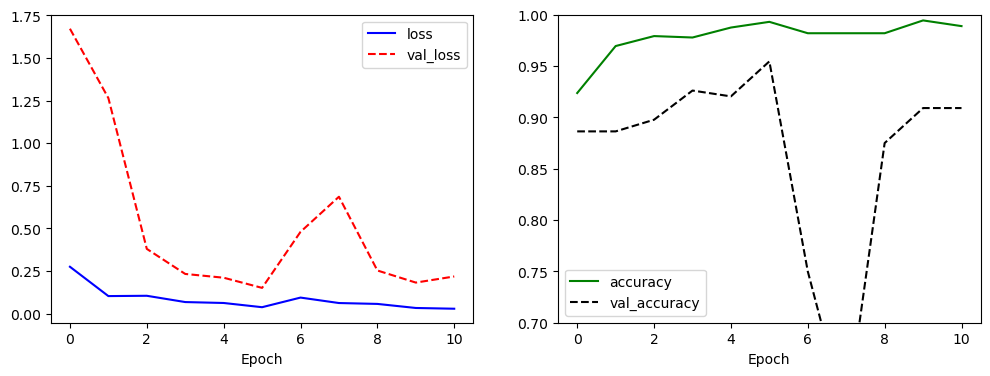

Found 920 images belonging to 2 classes.
Epoch 1/10


2023-07-16 19:49:00.910345: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


57/57 [==============================] - 3s 46ms/step - loss: 0.0291
Epoch 2/10
57/57 [==============================] - 2s 34ms/step - loss: 0.0171
Epoch 3/10
57/57 [==============================] - 2s 34ms/step - loss: 0.0090
Epoch 4/10
57/57 [==============================] - 2s 34ms/step - loss: 0.0066
Epoch 5/10
57/57 [==============================] - 2s 34ms/step - loss: 0.0061
Epoch 6/10
57/57 [==============================] - 2s 34ms/step - loss: 0.0060
Epoch 7/10
57/57 [==============================] - 2s 34ms/step - loss: 0.0060
Epoch 8/10
57/57 [==============================] - 2s 34ms/step - loss: 0.0057
Epoch 9/10
57/57 [==============================] - 2s 34ms/step - loss: 0.0057
Epoch 10/10
57/57 [==============================] - 2s 34ms/step - loss: 0.0051


In [4]:
# 필요한 라이브러리를 임포트합니다.
import os
import time
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import EfficientNetB0, MobileNetV2, densenet, resnet_v2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Flatten, Reshape, Dropout, ActivityRegularization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import matplotlib.pyplot as plt

# 데이터셋의 경로를 설정합니다.
train_dir = '/Users/kimsy/DataScience/dataset/fm_img/horizontal/train'
test_dir = '/Users/kimsy/DataScience/dataset/fm_img/horizontal/test'

# 이미지 데이터를 불러올 때 적용할 전처리 설정을 정의합니다.
datagen = ImageDataGenerator(rescale=1./255, 
                             rotation_range=1,
                             validation_split=0.2) # validation set을 위해 20%의 데이터를 분리합니다.

train_generator = datagen.flow_from_directory(train_dir,
                                              target_size=(224, 224),
                                              batch_size=16,
                                              class_mode='binary',
                                              subset='training')

validation_generator = datagen.flow_from_directory(train_dir,
                                                   target_size=(224, 224),
                                                   batch_size=16,
                                                   class_mode='binary',
                                                   subset='validation')

# 전이 학습 모델(EfficientNetB0)을 불러오고, 새로운 분류 층을 추가합니다.
# base_model = EfficientNetB0(weights='imagenet', include_top=False)

# # MobileNetV2 모델 불러오기
# base_model = MobileNetV2(weights='imagenet', include_top=False)

# Densnet
# base_model = densenet.DenseNet169(include_top=False, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

# Resnet_v2
base_model =  resnet_v2.ResNet101V2(include_top=False, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)  # Dropout 층을 추가합니다.
x = ActivityRegularization(l1=1e-5, l2=1e-4)(x)  # L1, L2 정규화를 추가합니다.
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# EarlyStopping 콜백을 정의합니다.
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# 모델을 컴파일합니다.
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습을 진행합니다. 이 때 EarlyStopping 콜백을 사용합니다.
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // train_generator.batch_size,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // validation_generator.batch_size,
                    epochs=20,
                    callbacks=[early_stopping])  # EarlyStopping 콜백을 추가합니다.

# 학습 결과(loss, accuracy)를 그래프로 시각화합니다.
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()


# 이상 탐지 모델을 정의하고 학습합니다.
# Autoencoder 모델을 예시로 사용하였습니다.
input_img = Input(shape=(224, 224, 3))
x = Flatten()(input_img)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
encoded = Dense(32, activation='relu')(x)

x = Dense(64, activation='relu')(encoded)
x = Dense(128, activation='relu')(x)
decoded = Dense(224 * 224 * 3, activation='sigmoid')(x)
decoded = Reshape((224, 224, 3))(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# 'good' 이미지만을 사용하여 Autoencoder를 학습합니다.
good_images = os.path.join(train_dir, 'good')  # 'good' 이미지 데이터를 로드합니다.

good_datagen = ImageDataGenerator(rescale=1./255)
good_generator = good_datagen.flow_from_directory(os.path.dirname(good_images), # good_images의 상위 디렉토리를 지정
                                                  target_size=(224, 224),
                                                  batch_size=16,
                                                  class_mode='input', # autoencoder는 input을 target으로 사용하므로 'input'을 지정
                                                  subset='training')

# 'good' 이미지만을 사용하여 Autoencoder를 학습합니다.
autoencoder.fit(good_generator,
                epochs=10,
                steps_per_epoch=good_generator.samples // good_generator.batch_size,
                callbacks=[early_stopping])  # EarlyStopping 콜백을 추가합니다.




In [6]:
# 결과를 저장할 리스트를 초기화합니다.
filenames = []
good_confidences = []
ng_confidences = []
anomaly_confidences = []
predictions = []
times = []

# 테스트 디렉토리를 탐색하며 각 파일에 대한 예측을 수행합니다.
for root, dirs, files in os.walk(test_dir):
    for file in files:
        if file.endswith(".jpg"):  # 이미지 파일만 처리합니다.
            img_path = os.path.join(root, file)
            img = load_img(img_path, target_size=(224, 224))
            img_array = img_to_array(img)
            img_batch = np.expand_dims(img_array, axis=0)

            start_time = time.time()
            classification_prediction = model.predict(img_batch)  # 이미지 분류 모델의 예측
            anomaly_prediction = autoencoder.predict(img_batch)  # 이상 탐지 모델의 예측
            end_time = time.time()

            # 'good', 'ng', 이상 탐지에 대한 신뢰도를 계산합니다.
            good_confidence = classification_prediction[0][0]
            ng_confidence = 1 - good_confidence
            anomaly_confidence = np.mean(np.power(img_batch - anomaly_prediction, 2))

            # 이상 탐지 모델의 예측이 'good'의 확률이 80% 미만인 경우, 'ng'로 판정합니다.
            if anomaly_confidence < 0.8:
                final_prediction = 'ng'
            else:
                final_prediction = 'good' if good_confidence > 0.5 else 'ng'

            filenames.append(file)
            good_confidences.append(good_confidence)
            ng_confidences.append(ng_confidence)
            anomaly_confidences.append(anomaly_confidence)
            predictions.append(final_prediction)
            times.append(end_time - start_time)

# 테스트 결과를 테이블로 출력합니다.
results = pd.DataFrame({
    'Filename': filenames,
    'Good Confidence': good_confidences,
    'NG Confidence': ng_confidences,
    'Anomaly Confidence': anomaly_confidences,
    'Prediction': predictions,
    'Inference Time': times
})


results



2023-07-16 20:01:43.336352: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 122ms/step


2023-07-16 20:01:45.786015: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 10ms/step


,Filename,Good Confidence,NG Confidence,Anomaly Confidence,Prediction,Inference Time
0,2022-12-27-145340365.jpg,1.0,0.0,52997.039062,good,2.919398
1,2022-12-27-145343052.jpg,1.0,0.0,51827.648438,good,0.375107
2,2022-12-27-150341020.jpg,1.0,0.0,53781.988281,good,0.069892
3,2022-12-27-150509702.jpg,1.0,0.0,53703.910156,good,0.085253
4,2022-12-27-145348956.jpg,1.0,0.0,53845.289062,good,0.070852
5,2022-12-27-150352799.jpg,1.0,0.0,53673.722656,good,0.070369
6,2022-12-27-150233552.jpg,1.0,0.0,53056.324219,good,0.070644
7,2022-12-27-152348017.jpg,1.0,0.0,54018.566406,good,0.068339
8,2022-12-27-151149811.jpg,1.0,0.0,53251.312500,good,0.069732
9,2022-12-27-153646721.jpg,1.0,0.0,54675.253906,good,0.398240


In [7]:
# 모델을 저장합니다.
model.save('ResNet_model.h5')  
autoencoder.save('Autoencoder_model.h5') 